# Building an image model from results obtained by fitting:

Initially we fit the M51 test image; then, from the fit results we build a model, and finnaly we subtract the model from the original image.

In [1]:
from astropy.io import fits
image = fits.open("../../test/data/M51.fits")
pixel_data = image[0].data

from ellipse.ellipse import Ellipse
ellipse = Ellipse(pixel_data)
isolist = ellipse.fit_image(sclip=2., nclip=3)

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1094.42 ( 8.44)  0.111 (0.007)  64.68 ( 1.7)  0.190    58     1   20     0
  11.00     1048.76 ( 7.36)  0.163 (0.005)  62.35 ( 1.0)  0.164    59     4   10     0
  12.10      989.97 ( 6.35)  0.163 (0.003)  72.48 ( 0.6)  0.116    62     7   10     0
  13.31      924.37 ( 6.97)  0.181 (0.004)  63.62 ( 0.7)  0.152    70     5   13     0
  14.64      895.86 ( 7.22)  0.139 (0.005)  25.70 ( 1.0)  0.164    78     7   18     0
  16.11      871.67 ( 7.69)  0.200 (0.004)  33.95 ( 0.6)  0.143    82     8   19     0
  17.72      764.53 ( 5.34)  0.053 (0.003)  39.51 ( 1.1)  0.092    85    23   24     0
  19.49      728.14 ( 4.55)  0.1

Now we build a model image. 

Note that we use a background estimate taken from the data array itself. This is arbitrary though, just for demo purposes in here.

In [2]:
import numpy as np
from ellipse.model import build_model

model_image = build_model(pixel_data, isolist, fill=np.mean(pixel_data[0:50,0:50]))

Interpolating....Done
SMA= 81.4
Done


In [3]:
print(pixel_data.shape)
print(model_image.shape)

(512, 512)
(512, 512)


Display (just the central, modeled region):

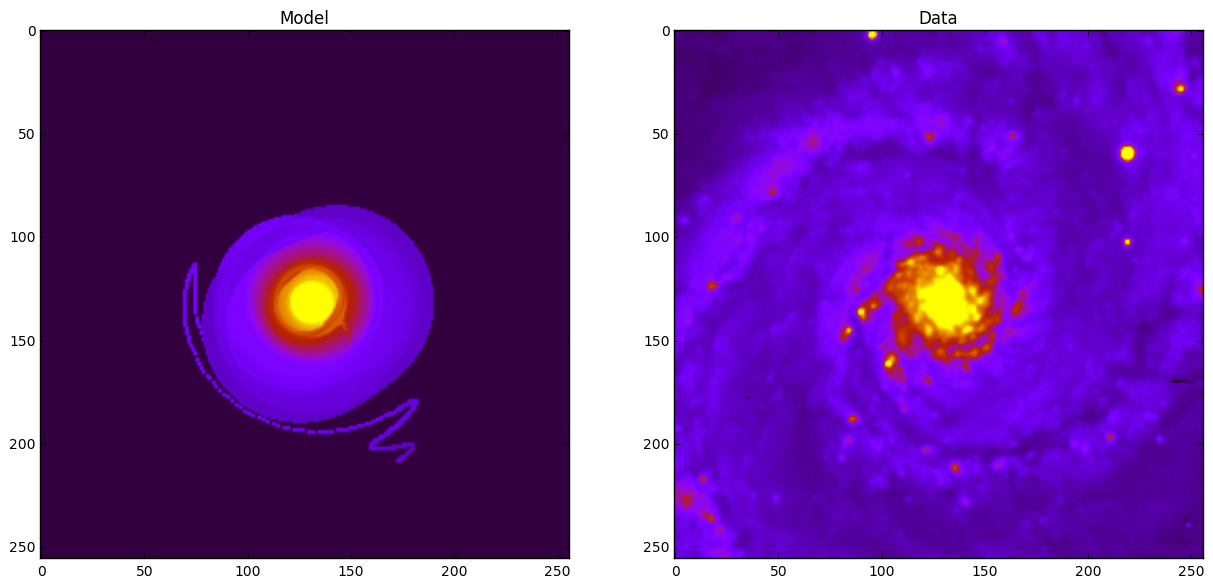

In [4]:
model = model_image[128:384,128:384]
data = pixel_data[128:384,128:384]

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(model, cmap=cm.gnuplot, vmin=0, vmax=1000)
ax1.set_title("Model")
ax2.imshow(data, cmap=cm.gnuplot, vmin=0, vmax=1000)
ax2.set_title("Data")


Finally, subtract model from data:


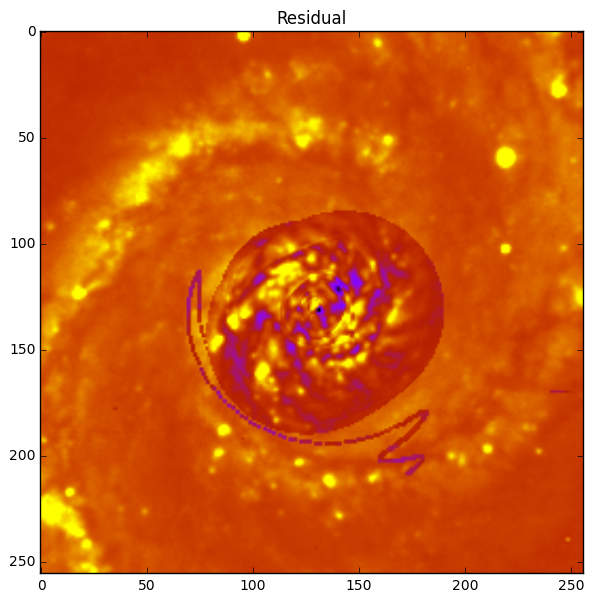

In [5]:
residual = data - model

plt.rcParams['figure.figsize'] = (10.0, 7.0)
fig, ax = plt.subplots()

ax.imshow(residual, cmap=cm.gnuplot, vmin=-300, vmax=300)
ax.set_title("Residual")

Of course, M51 is not the best object to test this procedure, since the non-elliptical contamination is so significant.

In order to better evaluate the limits of the modeling, we can resort to an artificial image of a "perfectly" elliptical object. That way, at least we can check that the entire procedure: fit -> model -> residual is internally consistent.

We use the 'synth.fits' image in the test/data/ directory in the 'isophote' package.

In [ ]:
from util.build_test_data import build
from ellipse.geometry import Geometry

#image = fits.open("../../test/data/synth.fits")
#pixel_data = image[0].data

pixel_data = build(eps=0.5, pa=np.pi/3., noise=1.e-2)

g = Geometry(256., 256., 10., 0.5, np.pi/3.)
ellipse = Ellipse(pixel_data, geometry=g)
isolist = ellipse.fit_image()
model_image = build_model(pixel_data, isolist, fill=np.mean(pixel_data[0:50,0:50]))
model = model_image
data = pixel_data
residual = data - model

Centering on object....   Done. Found x0 = 257.0, y0 = 257.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1043.73 ( 0.44)  0.497 (0.000)  59.97 ( 0.0)  0.005    43     0   20     0
  11.00      928.13 ( 0.29)  0.497 (0.000)  60.02 ( 0.0)  0.004    48     0   10     0
  12.10      823.17 ( 0.25)  0.497 (0.000)  60.01 ( 0.0)  0.003    52     0   10     0
  13.31      731.79 ( 0.16)  0.498 (0.000)  59.97 ( 0.0)  0.003    57     0   10     0
  14.64      648.95 ( 0.15)  0.498 (0.000)  59.99 ( 0.0)  0.002    63     0   10     0
  16.11      575.90 ( 0.09)  0.499 (0.000)  60.00 ( 0.0)  0.002    69     0   10     0
  17.72      510.57 ( 0.06)  0.499 (0.000)  59.99 ( 0.0)  0.001    76     0   10     0
  19.49      453.01 ( 0.04)  0.4

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(data, cmap=cm.gnuplot, vmin=0, vmax=700)
ax1.set_title("Data")
ax2.imshow(model, cmap=cm.gnuplot, vmin=0, vmax=700)
ax2.set_title("Model")
ax3.imshow(residual, cmap=cm.gnuplot, vmin=-50, vmax=50)
ax3.set_title("Residual")

iso1 = isolist.get_closest(50.)
iso2 = isolist.get_closest(150.)
iso3 = isolist.get_closest(250.)

x, y, = iso1.sampled_coordinates()
#plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
#plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
#plt.plot(x, y, color='white')
